In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [2]:
data = pd.read_csv('yoga_dataset.csv')
data.head()

,User_ID,Date,Pose_Proficiency (%),Session_Duration (min),Engagement_Score,Calories_Burned,Weight (kg)
0,1,2024-12-01,77,53,7,226,69.97
1,1,2024-12-02,64,50,6,278,69.93
2,1,2024-12-03,72,48,9,177,69.91
3,1,2024-12-04,98,43,7,207,69.88
4,1,2024-12-05,94,53,5,188,69.86


# 1) Yoga Report of an individual
NOTE: Here we are taking just one person out of ten different person from the dataset for analysis on the yoga report.

In [3]:
m1 = data['User_ID'] == 1

cal_1 = data[m1]['Calories_Burned']
score_1 = data[m1]['Engagement_Score']
date_1 = data[m1]['Date']
session_1 = data[m1]['Session_Duration (min)']
pose_1 =data[m1]['Pose_Proficiency (%)']
weight_1 = data[m1]['Weight (kg)']

## 1.1) Finding relation between Pose-Proficiency and Session-Duration 

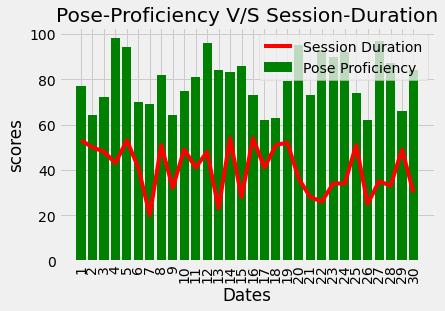

In [4]:
plt.style.use('fivethirtyeight')

plt.bar(range(1, len(date_1)+1), pose_1, color='green', label="Pose Proficiency")
plt.plot(range(1, len(date_1)+1), session_1, color='red', label="Session Duration")

plt.xticks(range(1, len(date_1)+1), rotation=90)  

plt.xlabel('Dates')
plt.ylabel('scores')
plt.title('Pose-Proficiency V/S Session-Duration')
plt.legend()
plt.show()

### In the above graph we can see for smaller session the Pose-Proficiency is high, whereas for longer session the Pose-Proficiency decreases. This is because when you do Yoga for longer time then you start to get tired hence decreaing your Proficiency for that day. 
 NOTE: This is a self generated data so it's not very visible trend in the graph on some days.

## 1.2) Analysis Weight loss of an idividual

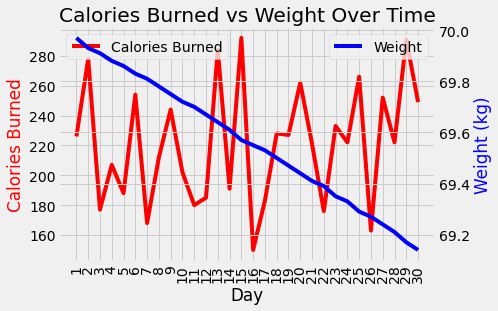

In [5]:
fig, ax1 = plt.subplots()


ax1.plot(range(1, len(date_1)+1), cal_1, color='red', label="Calories Burned")
ax1.set_xlabel("Day")
ax1.set_ylabel("Calories Burned", color='red')

plt.xticks(range(1, len(date_1)+1), rotation=90)  


ax2 = ax1.twinx()
ax2.plot(range(1, len(date_1)+1), weight_1, color='blue', label="Weight")
ax2.set_ylabel("Weight (kg)", color='blue')

plt.xticks(range(1, len(date_1)+1), rotation=90)  

plt.title("Calories Burned vs Weight Over Time")
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

### Here in the  above plot  we can see that weight of this person decreases over time, also it can be seen the calories he is burning. More burning in the calories results in more decrease of the weight , here the weight deacrsses linearly in the dataset(as it was made like that).

# ---------------------------------------------------------------------------------------------------------------
# 2) Gerenal report or trend on the all individuals doing Yoga

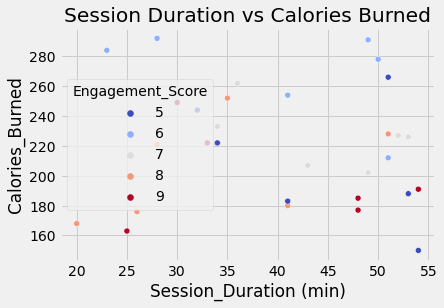

In [6]:
sns.scatterplot(x=session_1,  y=cal_1,  hue=score_1, palette="coolwarm", data=data)
plt.title("Session Duration vs Calories Burned")
plt.show()

#### Here if we observe the graph it can be seen that longer session of Yoga are resulting in more calorie burn.

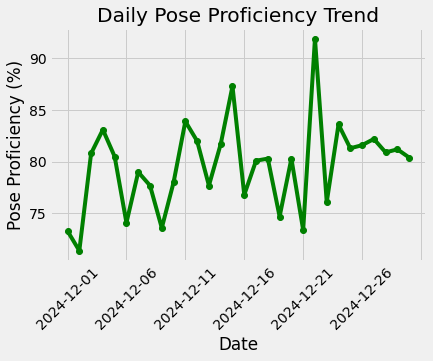

In [7]:
daily_trend = data.groupby("Date")["Pose_Proficiency (%)"].mean()
daily_trend.plot(kind='line', marker='o', color='green', title='Daily Pose Proficiency Trend')
plt.ylabel("Pose Proficiency (%)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.show()


#### Here we take the mean of pose proficiency column for every day in the month, & plot it with respect to dates.
--> This show how people are practicing on Yoga poses; means that may be some poses that are induced in there routine(like the poses b/w 16th-21st) is easy for people to do in right way.

--> This can show that during which period of the month people were motivated; means maybe there was a breif us session on the Yoga poses in a particular period of the month resulting in better poses.

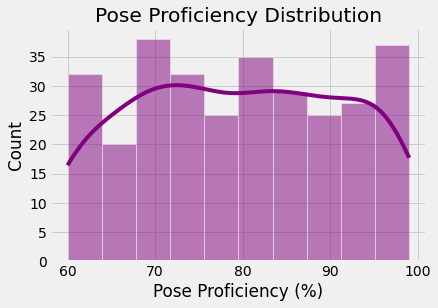

In [8]:
sns.histplot(data["Pose_Proficiency (%)"], kde=True, color='purple')
plt.title("Pose Proficiency Distribution")
plt.xlabel("Pose Proficiency (%)")
plt.show()

#### This shows accurate poses of people during the session throughout the month.

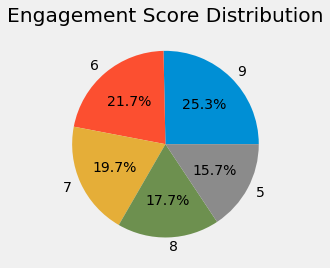

In [9]:
engagement_distribution = data["Engagement_Score"].value_counts()
engagement_distribution.plot(kind='pie', autopct='%1.1f%%', title='Engagement Score Distribution')
plt.ylabel("") 
plt.show()

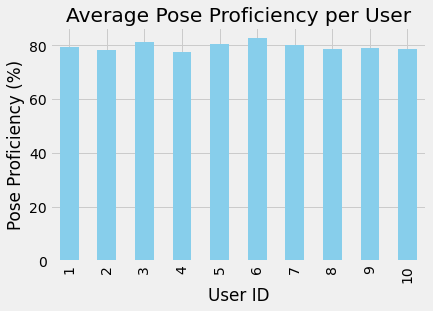

In [10]:
avg_proficiency = data.groupby("User_ID")["Pose_Proficiency (%)"].mean()
avg_proficiency.plot(kind='bar', color='skyblue', title='Average Pose Proficiency per User')
plt.ylabel("Pose Proficiency (%)")
plt.xlabel("User ID")
plt.show()

# Model Development:

In [11]:
data.head()

,User_ID,Date,Pose_Proficiency (%),Session_Duration (min),Engagement_Score,Calories_Burned,Weight (kg)
0,1,2024-12-01,77,53,7,226,69.97
1,1,2024-12-02,64,50,6,278,69.93
2,1,2024-12-03,72,48,9,177,69.91
3,1,2024-12-04,98,43,7,207,69.88
4,1,2024-12-05,94,53,5,188,69.86


## Defining features(i/p) & target(o/p) for the model:

In [12]:
x = data.drop(['User_ID', 'Date', 'Weight (kg)'], axis=1)
y = data['Calories_Burned']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2)

## Appling Linear regressor model

In [14]:
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

LinearRegression()

In [15]:
lin_y_pred = lin_model.predict(x_test)

## Appling Lasso regressor model

In [16]:
las_model = Lasso()
las_model.fit(x_train, y_train)

Lasso()

In [17]:
las_y_pred = las_model.predict(x_test)

## Appling Decision Tree Regressor model

In [18]:
tree_model = DecisionTreeRegressor()
tree_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [19]:
tree_y_pred = tree_model.predict(x_test)

## Model Evaluation:

In [20]:
rms = metrics.r2_score(y_test, lin_y_pred)
mae = metrics.mean_absolute_error(y_test, lin_y_pred)

print('The Root Mean Squared error for Linear model is: ', rms, '& Mean Absolute Error is: ', mae)

The Root Mean Squared error for Linear model is:  1.0 & Mean Absolute Error is:  2.5579538487363607e-14


In [21]:
rms = metrics.r2_score(y_test, las_y_pred)
mae = metrics.mean_absolute_error(y_test, las_y_pred)

print('The Root Mean Squared error for Lasso model is: ', rms, '& Mean Absolute Error is: ', mae)

The Root Mean Squared error for Lasso model is:  0.9999996716309633 & Mean Absolute Error is:  0.01969357555375666


In [22]:
rms = metrics.r2_score(y_test, tree_y_pred)
mae = metrics.mean_absolute_error(y_test, tree_y_pred)

print('The Root Mean Squared error for Decision Tree Regressor model is: ', rms, '& Mean Absolute Error is: ', mae)

The Root Mean Squared error for Decision Tree Regressor model is:  0.9996552071495164 & Mean Absolute Error is:  0.43333333333333335


## Model Performance Visualization

Linear Regressor Model:



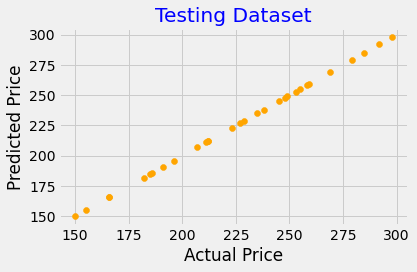


Lasso Regressor MODEL:



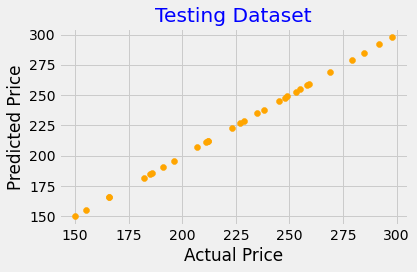


Decision Tree REGRESSOR MODEL:



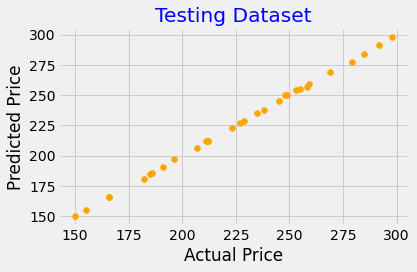

In [23]:
print('Linear Regressor Model:\n')
plt.scatter(y_test, lin_y_pred, color='orange')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Testing Dataset', color='blue')

# Adjust layout and display the plots
plt.tight_layout()  # Ensures there is proper spacing between plots
plt.show()

#-------------------------------------------------------------------------------------------------------------------------------

print('\nLasso Regressor MODEL:\n')
plt.scatter(y_test, las_y_pred, color='orange')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Testing Dataset', color='blue')

plt.tight_layout()  
plt.show()

#-------------------------------------------------------------------------------------------------------------------------------

print('\nDecision Tree REGRESSOR MODEL:\n') 
plt.scatter(y_test, tree_y_pred, color='orange')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Testing Dataset', color='blue')

plt.tight_layout()  
plt.show()

## This graph is linear because the dataset that the model is trained on is generated (not real), so the models are giving graph like this(OVERFITTING CURVE).